In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


## 1.EDA( Data Cleaning)

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
df.isnull().sum()


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [4]:
df.size

15796

In [5]:
df.shape

(1436, 11)

In [6]:
df.duplicated().any()

True

In [7]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1435, 11)


 since we check outliers for numerical columns only so we drop categorical column first. Here 'Fuel_Type'  is the  categorical column we drop it first from the dataset. 

In [10]:
## labeling  of 'Fuel_Type' column
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [88]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df['Fuel_Type']=lab_enc.fit_transform(df[['Fuel_Type']])
df


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


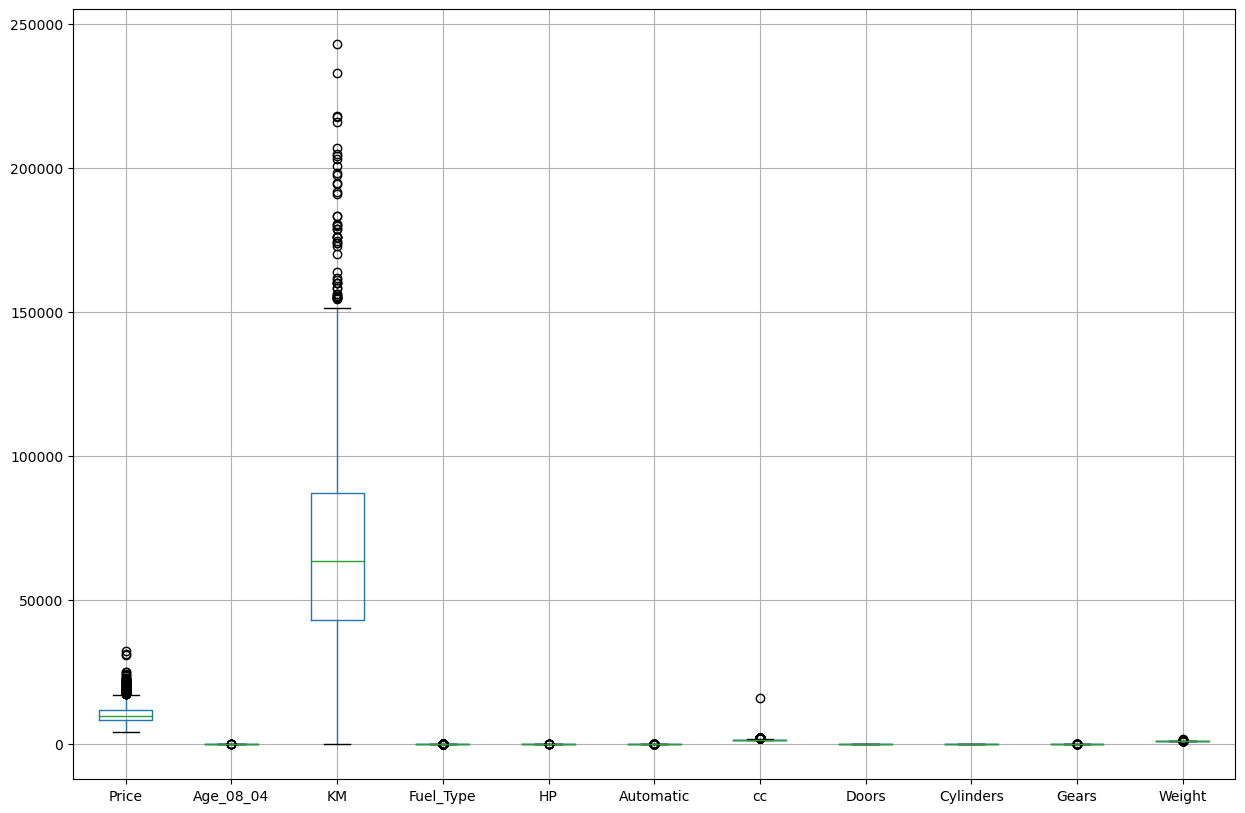

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.boxplot()
plt.show()


In [13]:
## removing Outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print('IQR for each column:',IQR)


IQR for each column: Price         3500.0
Age_08_04       26.0
KM           44041.5
Fuel_Type        0.0
HP              20.0
Automatic        0.0
cc             200.0
Doors            2.0
Cylinders        0.0
Gears            0.0
Weight          45.0
dtype: float64


In [14]:
upper_quant=Q3+1.5*IQR
print('upper_quant:',upper_quant)
lowe_quant=Q1-1.5*IQR
print('lowe_quant:',lowe_quant)

upper_quant: Price         17200.00
Age_08_04       109.00
KM           153103.75
Fuel_Type         2.00
HP              140.00
Automatic         0.00
cc             1900.00
Doors             8.00
Cylinders         4.00
Gears             5.00
Weight         1152.50
dtype: float64
lowe_quant: Price         3200.00
Age_08_04        5.00
KM          -23062.25
Fuel_Type        2.00
HP              60.00
Automatic        0.00
cc            1100.00
Doors            0.00
Cylinders        4.00
Gears            5.00
Weight         972.50
dtype: float64


In [15]:
## removing outliers from column'price'
##df1p=df withot outliers in price colum
df1p=df[(df['Price']>3200) & (df['Price']<17200)]
df1p


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [16]:
## removing outliers from 'KM ' column
## df1k= df without outliers in price and km column
df1k=df1p[(df1p['KM']>-23062.25) & (df1p['KM']<153103.75)]
df1k

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [17]:
## removin outliers from 'cc' column
## df1c= df without outliers in columns 'cc','price'and 'KM'
df1c=df1p[(df1p['cc']>1100.00) & (df1p['cc']<1900.00)]
df1c


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
21,16950,29,43905,2,110,1,1600,3,4,5,1170
22,15950,28,56349,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [18]:
## removin outliers from 'Weight' column
##df1w= df without outliers in columns 'cc','price', 'KM' and 'Weight' column
df1w=df1c[(df1c['Weight']>972.50) & (df1c['Weight']<1152.50)]
df1w


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
18,16750,24,25563,2,110,0,1600,3,4,5,1065
19,16950,30,64359,2,110,0,1600,3,4,5,1105
20,15950,30,67660,2,110,0,1600,3,4,5,1105
22,15950,28,56349,2,110,0,1600,3,4,5,1120
23,16950,28,32220,2,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [19]:
## checking for correlation( we check correlation for numerical columns only)
df1c.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.857725,-0.548778,0.053410,0.186182,0.016461,0.109998,0.169885,NaN,0.021724,0.387998
Age_08_04,-0.857725,1.000000,0.466564,0.031494,-0.081149,0.063113,-0.037991,-0.115843,NaN,0.018026,-0.293820
KM,-0.548778,0.466564,1.000000,-0.228736,0.001433,-0.055723,0.065583,-0.013600,NaN,0.064696,-0.075853
Fuel_Type,0.053410,0.031494,-0.228736,1.000000,-0.044578,0.002877,-0.103879,-0.025337,NaN,0.053254,-0.156461
HP,0.186182,-0.081149,0.001433,-0.044578,1.000000,-0.046894,0.953403,0.182255,NaN,0.070953,0.434185
Automatic,0.016461,0.063113,-0.055723,0.002877,-0.046894,1.000000,-0.019871,-0.041122,NaN,-0.107498,0.125518
cc,0.109998,-0.037991,0.065583,-0.103879,0.953403,-0.019871,1.000000,0.196592,NaN,0.071951,0.449234
Doors,0.169885,-0.115843,-0.013600,-0.025337,0.182255,-0.041122,0.196592,1.000000,NaN,-0.160096,0.412002
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.021724,0.018026,0.064696,0.053254,0.070953,-0.107498,0.071951,-0.160096,NaN,1.000000,-0.003999


In [20]:
df2=df1c.drop(['Cylinders','Automatic','Fuel_Type','HP'],axis=1)
df2

,Price,Age_08_04,KM,cc,Doors,Gears,Weight
18,16750,24,25563,1600,3,5,1065
19,16950,30,64359,1600,3,5,1105
20,15950,30,67660,1600,3,5,1105
21,16950,29,43905,1600,3,5,1170
22,15950,28,56349,1600,3,5,1120
...,...,...,...,...,...,...,...
1431,7500,69,20544,1300,3,5,1025
1432,10845,72,19000,1300,3,5,1015
1433,8500,71,17016,1300,3,5,1015
1434,7250,70,16916,1300,3,5,1015


In [21]:
## Scaling
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()

In [22]:
df3=pd.DataFrame(std_sca.fit_transform(df2))
df3


,0,1,2,3,4,5,6
0,2.920296,-2.328455,-1.389676,0.685286,-1.051755,-0.134835,0.229042
1,3.006688,-1.934002,-0.079518,0.685286,-1.051755,-0.134835,1.404095
2,2.574727,-1.934002,0.031959,0.685286,-1.051755,-0.134835,1.404095
3,3.006688,-1.999744,-0.770259,0.685286,-1.051755,-0.134835,3.313556
4,2.574727,-2.065486,-0.350019,0.685286,-1.051755,-0.134835,1.844740
...,...,...,...,...,...,...,...
1191,-1.075339,0.629936,-1.559170,-1.665478,-1.051755,-0.134835,-0.946011
1192,0.369569,0.827162,-1.611312,-1.665478,-1.051755,-0.134835,-1.239774
1193,-0.643378,0.761420,-1.678312,-1.665478,-1.051755,-0.134835,-1.239774
1194,-1.183329,0.695678,-1.681690,-1.665478,-1.051755,-0.134835,-1.239774


In [23]:
## renaming the columns

In [24]:
df2.columns

Index(['Price', 'Age_08_04', 'KM', 'cc', 'Doors', 'Gears', 'Weight'], dtype='object')

In [25]:
df3.rename(columns={0:'Price', 1:'Age_08_04',2: 'KM',  3:'cc',4: 'Doors',5: 'Gears',6: 'Weight'},inplace=True)

In [26]:
df3.describe()


,Price,Age_08_04,KM,cc,Doors,Gears,Weight
count,1.196000e+03,1.196000e+03,1.196000e+03,1.196000e+03,1.196000e+03,1.196000e+03,1.196000e+03
mean,-1.425838e-16,-4.752794e-17,1.307018e-16,3.326956e-16,4.455745e-16,-1.924882e-15,-8.911489e-16
std,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00,1.000418e+00
min,-2.436015e+00,-3.051617e+00,-2.252917e+00,-1.665478e+00,-2.102631e+00,-1.053887e+01,-1.680419e+00
25%,-6.703760e-01,-6.191622e-01,-7.200588e-01,-8.818901e-01,-1.051755e+00,-1.348349e-01,-6.522478e-01
50%,-1.034278e-01,1.697419e-01,-1.186407e-01,6.852856e-01,-8.786590e-04,-1.348349e-01,-6.472126e-02
75%,4.349030e-01,7.614200e-01,5.684024e-01,6.852856e-01,1.049997e+00,-1.348349e-01,5.228053e-01
max,3.006688e+00,1.353098e+00,4.741384e+00,2.252461e+00,1.049997e+00,5.067181e+00,1.638602e+01


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1196 non-null   float64
 1   Age_08_04  1196 non-null   float64
 2   KM         1196 non-null   float64
 3   cc         1196 non-null   float64
 4   Doors      1196 non-null   float64
 5   Gears      1196 non-null   float64
 6   Weight     1196 non-null   float64
dtypes: float64(7)
memory usage: 65.5 KB


In [28]:
import seaborn as sns 

In [29]:
import warnings
warnings.filterwarnings('ignore')


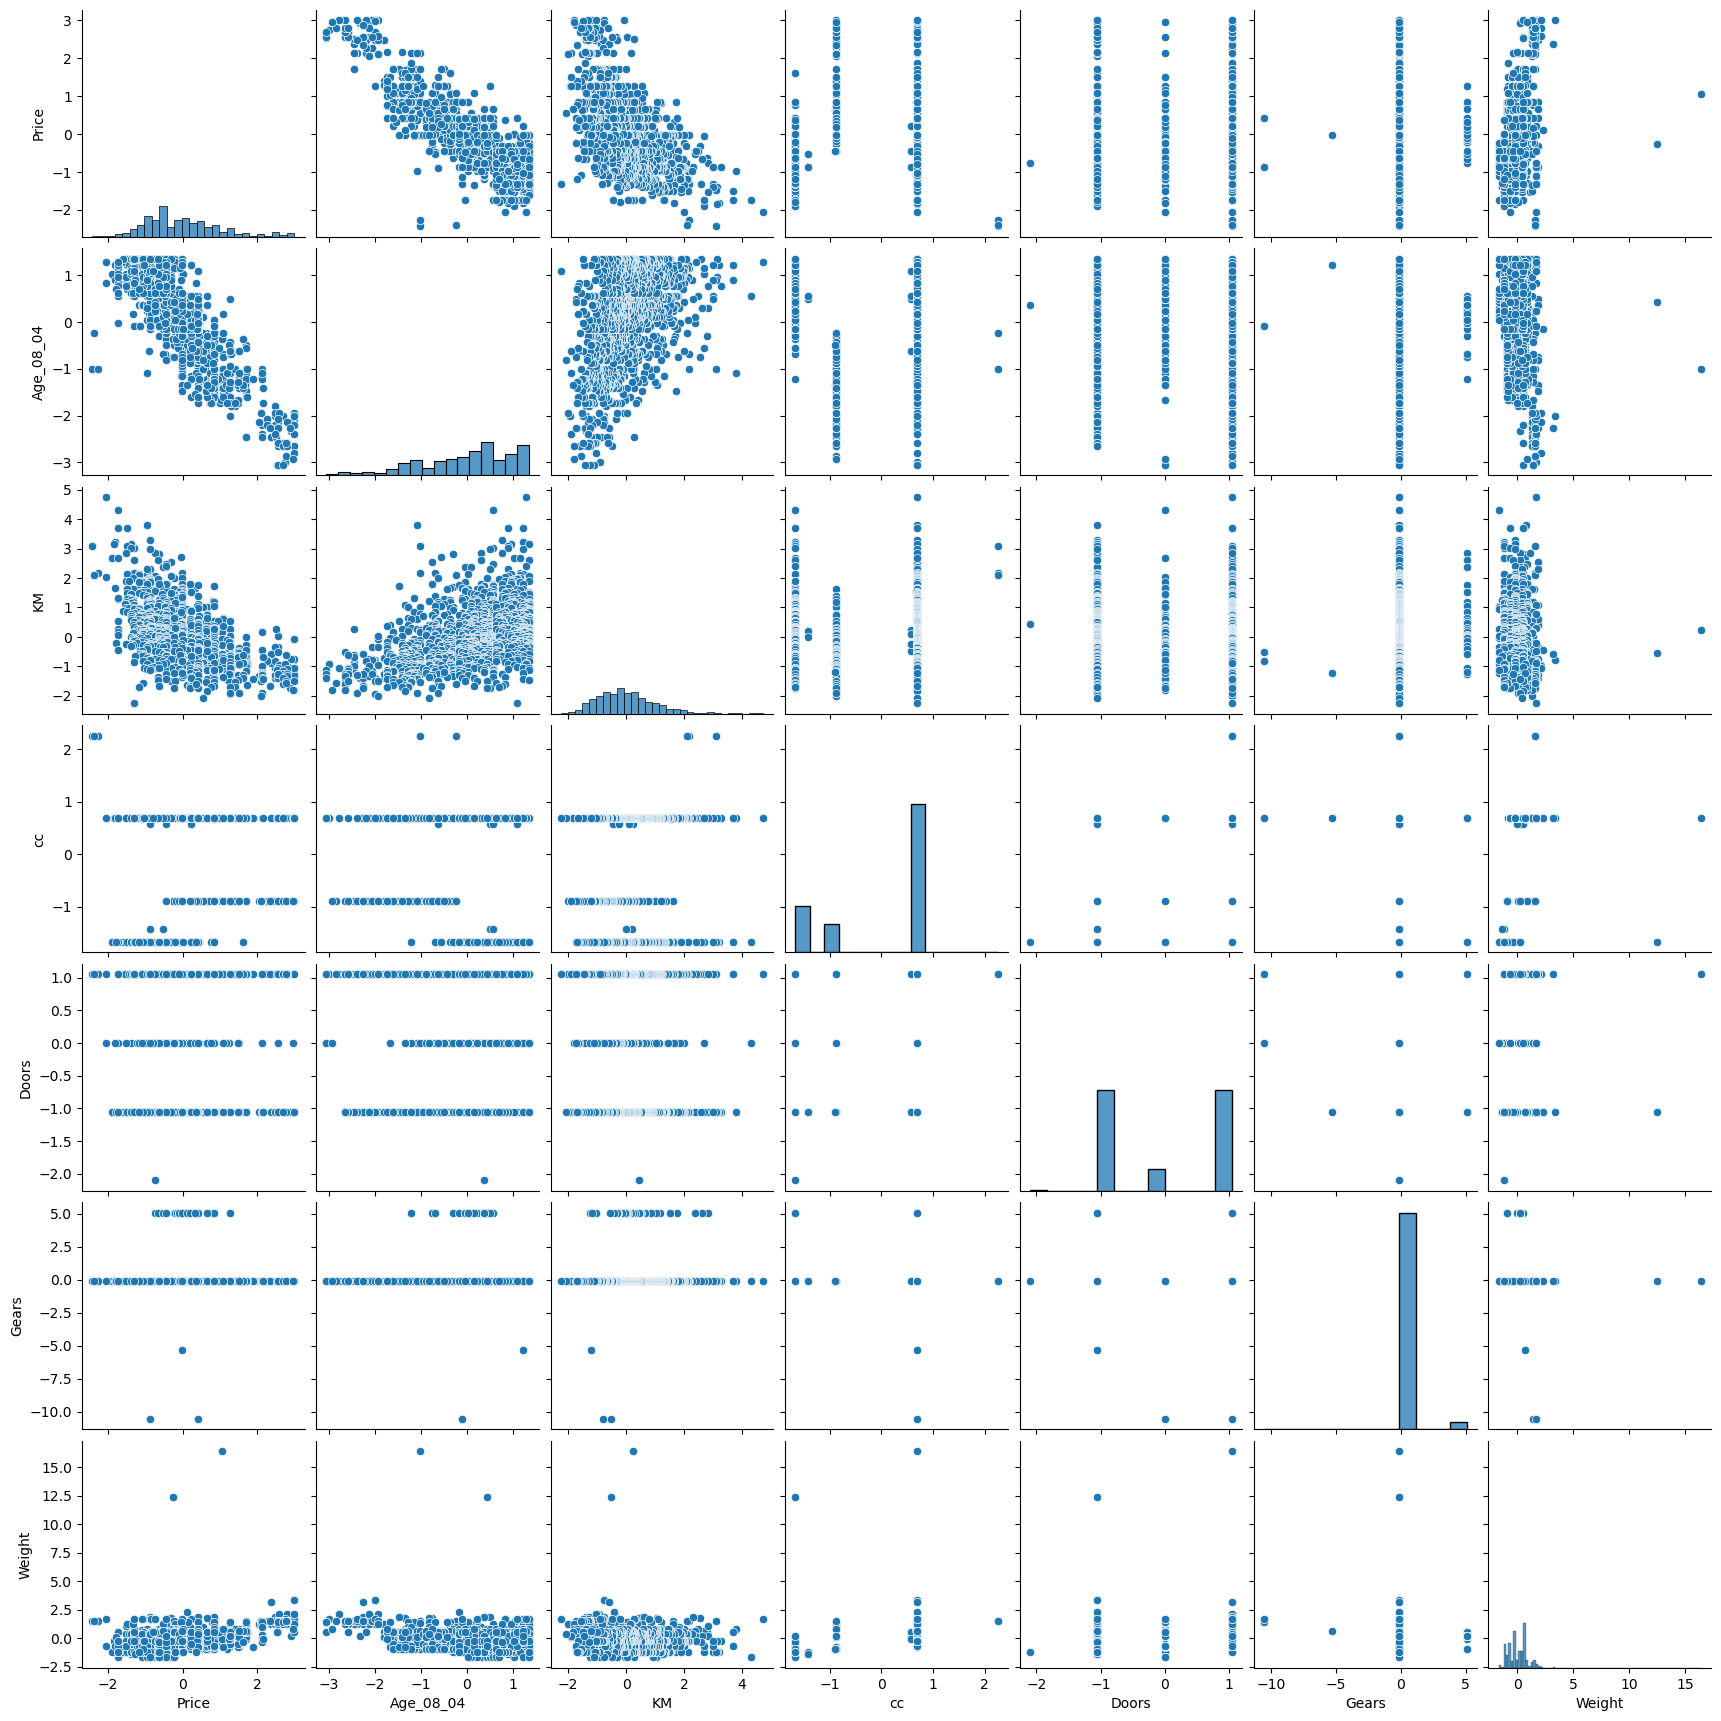

In [30]:
sns.pairplot(df3)
plt.show()

## 2.Spliting the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [31]:
## spliting of dataset into training and testing
from sklearn.model_selection import train_test_split

In [32]:
features=df3.drop('Price',axis=1)
features


,Age_08_04,KM,cc,Doors,Gears,Weight
0,-2.328455,-1.389676,0.685286,-1.051755,-0.134835,0.229042
1,-1.934002,-0.079518,0.685286,-1.051755,-0.134835,1.404095
2,-1.934002,0.031959,0.685286,-1.051755,-0.134835,1.404095
3,-1.999744,-0.770259,0.685286,-1.051755,-0.134835,3.313556
4,-2.065486,-0.350019,0.685286,-1.051755,-0.134835,1.844740
...,...,...,...,...,...,...
1191,0.629936,-1.559170,-1.665478,-1.051755,-0.134835,-0.946011
1192,0.827162,-1.611312,-1.665478,-1.051755,-0.134835,-1.239774
1193,0.761420,-1.678312,-1.665478,-1.051755,-0.134835,-1.239774
1194,0.695678,-1.681690,-1.665478,-1.051755,-0.134835,-1.239774


In [33]:
target=df3[['Price']]
target

,Price
0,2.920296
1,3.006688
2,2.574727
3,3.006688
4,2.574727
...,...
1191,-1.075339
1192,0.369569
1193,-0.643378
1194,-1.183329


In [34]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=.80,random_state=100)

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(956, 6)
(240, 6)
(956, 1)
(240, 1)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model.

In [36]:
## Train the model
from sklearn.linear_model import LinearRegression

In [37]:
lin_reg=LinearRegression()

In [38]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [39]:
## traninig validation
y_pred=lin_reg.predict(x_train)

In [40]:
## testing validation
y_pred1=lin_reg.predict(x_test)


In [89]:
lin_reg.coef_

array([[-0.7359779 , -0.1964355 ,  0.01308889,  0.02860497,  0.05405488,
         0.15320416]])

In [90]:
lin_reg.intercept_

array([0.0039471])

In [41]:
##Evaluation of perfomance of the model
from sklearn.metrics import r2_score

In [42]:
r2_score(y_train,y_pred)

0.7926846101255997

# 4.Evaluation of the performance of the model

In [43]:
r2_score(y_test,y_pred1)

0.7817855149587097

## 5.Applying Lasso and Ridge methods on the model.

In [45]:
## Applying lasso and ridge method on the model
## 1. lasso method
from sklearn.linear_model import Lasso,Ridge

In [46]:
lasso=Lasso(alpha=1)


In [47]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [48]:
lasso.coef_

array([-0., -0.,  0.,  0.,  0.,  0.])

In [49]:
lasso.intercept_

array([-0.01482485])

In [50]:
y_predict=lasso.predict(x_train)

In [51]:
y_predict1=lasso.predict(x_test)

In [52]:
r2_score(y_train,y_predict)

0.0

In [53]:
## finding proper value of alpha using Gridsearch
a=range(1,100)

In [54]:
params=dict(alpha=a)


In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid_sea=GridSearchCV(lasso,params)

In [57]:
grid_sea.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1), param_grid={'alpha': range(1, 100)})

In [58]:
grid_sea.best_params_

{'alpha': 1}

In [59]:
## Aplying Ridge metghod
ridge=Ridge(alpha=1)

In [60]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [61]:
ridge.coef_

array([[-0.73507367, -0.19663606,  0.01308441,  0.02862381,  0.05400962,
         0.15329094]])

In [62]:
ridge.intercept_

array([0.00393523])

In [63]:
y_pred=ridge.predict(x_train)

In [65]:
r2_score(y_train,y_pred)

0.7926839810626457

In [80]:
y_pred1=ridge.predict(x_test)

In [67]:
r2_score(y_test,y_pred1)

0.7819504527233385

In [74]:
## finding  proper value of alpha using gridsearch
a=range(1,100)

params=dict(alpha=a)
grid_search=GridSearchCV(ridge,params)


In [75]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=1), param_grid={'alpha': range(1, 100)})

In [76]:
grid_search.best_params_

{'alpha': 51}

In [77]:
## so in above equation we will use alpha =51 to get more accurate prediction
ridge1=Ridge(alpha=51)

In [78]:
ridge1.fit(x_train,y_train)

Ridge(alpha=51)

In [81]:
y_pred=ridge1.predict(x_train)

In [82]:
y_pred1=ridge1.predict(x_test)

In [83]:
r2_score(y_train,y_pred)

0.7912512021691793

In [84]:
r2_score(y_test,y_pred1)

0.7880027053412703